In [2]:
#!git clone https://github.com/hussnain-imtiaz/POI_Analysis.git
#!mv /content/POI_Analysis/final_project /content
#!mv /content/POI_Analysis/tools /content

Cloning into 'POI_Analysis'...
remote: Enumerating objects: 4681, done.
remote: Counting objects: 100% (4681/4681), done.
remote: Compressing objects: 100% (485/485), done.
remote: Total 4681 (delta 4195), reused 4676 (delta 4194), pack-reused 0
Receiving objects: 100% (4681/4681), 14.86 MiB | 15.95 MiB/s, done.
Resolving deltas: 100% (4195/4195), done.


# Installing all the required tools:
Any missing tool(s) can be installed by using pip command. 


In [ ]:
#!pip install pycaret
#!pip install numpy
#!pip install pandas matplotlib seaborn sklearn

# 2. Getting the Tools Ready:

In [1]:
import pandas as pd
import sys
import numpy as np
import pickle
from pycaret.classification import * 
import seaborn as sns
import matplotlib.pyplot as plt

from final_project.tester import dump_classifier_and_data
from tools.feature_format import featureFormat, targetFeatureSplit


# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from final_project.tester import test_classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# 3. Loading the data:

In [2]:
### Load the dictionary containing the dataset
with open("/content/final_project/final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

# 4. Getting the data Ready:

In the intial run we will take all the available features and then based on analysis report we will select the best ones. 

In [3]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances',
                 'bonus', 'restricted_stock_deferred', 'deferred_income',
                 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'other', 'long_term_incentive', 'restricted_stock', 'director_fees',
                 'to_messages', 'from_poi_to_this_person', 'from_messages',
                 'from_this_person_to_poi', 'shared_receipt_with_poi'] 

In [4]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)

### converting the data to df for some analysis and exploration
my_data = pd.DataFrame(data, columns=features_list)
my_data.head()

,poi,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
0,0.0,201955.0,2869717.0,4484442.0,0.0,4175000.0,-126027.0,-3081055.0,1729541.0,13868.0,1729541.0,152.0,304805.0,126027.0,0.0,2902.0,47.0,2195.0,65.0,1407.0
1,0.0,0.0,178980.0,182466.0,0.0,0.0,0.0,0.0,257817.0,3486.0,257817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,477.0,0.0,916197.0,0.0,0.0,-560222.0,-5104.0,5243487.0,56301.0,4046157.0,864523.0,0.0,1757552.0,0.0,566.0,39.0,29.0,0.0,465.0
3,0.0,267102.0,1295738.0,5634343.0,0.0,1200000.0,0.0,-1386055.0,10623258.0,11200.0,6680544.0,2660303.0,1586055.0,3942714.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,239671.0,260455.0,827696.0,0.0,400000.0,-82782.0,-201641.0,63014.0,129142.0,0.0,69.0,0.0,145796.0,0.0,0.0,0.0,0.0,0.0,0.0


### i. Exploratory Data Analysis

In [5]:
# inspect info
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   poi                        145 non-null    float64
 1   salary                     145 non-null    float64
 2   deferral_payments          145 non-null    float64
 3   total_payments             145 non-null    float64
 4   loan_advances              145 non-null    float64
 5   bonus                      145 non-null    float64
 6   restricted_stock_deferred  145 non-null    float64
 7   deferred_income            145 non-null    float64
 8   total_stock_value          145 non-null    float64
 9   expenses                   145 non-null    float64
 10  exercised_stock_options    145 non-null    float64
 11  other                      145 non-null    float64
 12  long_term_incentive        145 non-null    float64
 13  restricted_stock           145 non-null    float64

**We see no missing values because they were imputed with '0'. But it doesnt mean that there is no missing values. We will find their % later.**

#### (A). Total Number of data points and their distribution across different classes (poi/non-poi)

In [6]:
### how many data points we have?
len(my_data)

145

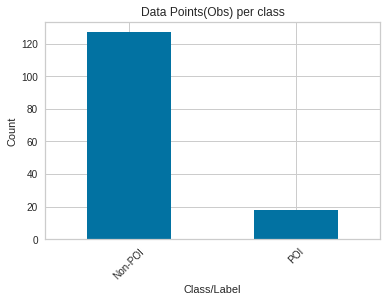

In [7]:
### distribution across different classes
plt.title('Data Points(Obs) per class')
plt.xlabel('Class/Label')
plt.ylabel('Count')
my_data['poi'].value_counts().plot.bar()
plt.xticks([0, 1], labels=['Non-POI', 'POI'], rotation=45)
plt.show()

#### (B). Looking up for the missing values in availble features and filtereing the ones with less than 50% missing values. 

In [8]:
### find how many values are missing in each column
filtered_features_missing = []
missing_count = []
for col in features_list[1:]:
  missing_vals = len(my_data[col][np.where(my_data[col]==0)[0]])
  missing_count.append(missing_vals)
  total_vals = len(my_data[col])
  ptc_missing = missing_vals / total_vals
  if ptc_missing < 0.5:
    filtered_features_missing.append(col)
  print(f'{col} = {ptc_missing:.2f}%')

salary = 0.34%
deferral_payments = 0.73%
total_payments = 0.14%
loan_advances = 0.97%
bonus = 0.43%
restricted_stock_deferred = 0.88%
deferred_income = 0.66%
total_stock_value = 0.13%
expenses = 0.34%
exercised_stock_options = 0.30%
other = 0.36%
long_term_incentive = 0.54%
restricted_stock = 0.24%
director_fees = 0.88%
to_messages = 0.41%
from_poi_to_this_person = 0.49%
from_messages = 0.41%
from_this_person_to_poi = 0.54%
shared_receipt_with_poi = 0.41%


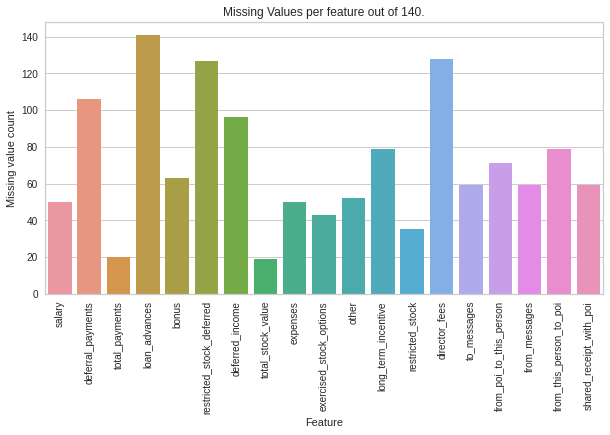

In [9]:
### Visualizing the missing values (by count)
plt.figure(figsize=(10,5))
sns.barplot(x=features_list[1:], y=missing_count)
plt.xticks(rotation=90)
plt.title('Missing Values per feature out of 140.')
plt.xlabel('Feature')
plt.ylabel('Missing value count')
plt.show()

In [10]:
### some filtered features those are having less than 50% missing values
filtered_features_missing

['salary',
 'total_payments',
 'bonus',
 'total_stock_value',
 'expenses',
 'exercised_stock_options',
 'other',
 'restricted_stock',
 'to_messages',
 'from_poi_to_this_person',
 'from_messages',
 'shared_receipt_with_poi']

#### (C). Finding the correlation between dependent and independant variable

In [11]:
my_data.corr().iloc[0]

poi                          1.000000
salary                      -0.001058
deferral_payments           -0.040847
total_payments               0.049386
loan_advances                0.131550
bonus                        0.023341
restricted_stock_deferred   -0.005402
deferred_income             -0.039149
total_stock_value            0.034064
expenses                    -0.009886
exercised_stock_options      0.039922
other                        0.021832
long_term_incentive          0.012467
restricted_stock             0.014801
director_fees               -0.061847
to_messages                  0.110006
from_poi_to_this_person      0.191549
from_messages               -0.033302
from_this_person_to_poi      0.130319
shared_receipt_with_poi      0.242105
Name: poi, dtype: float64

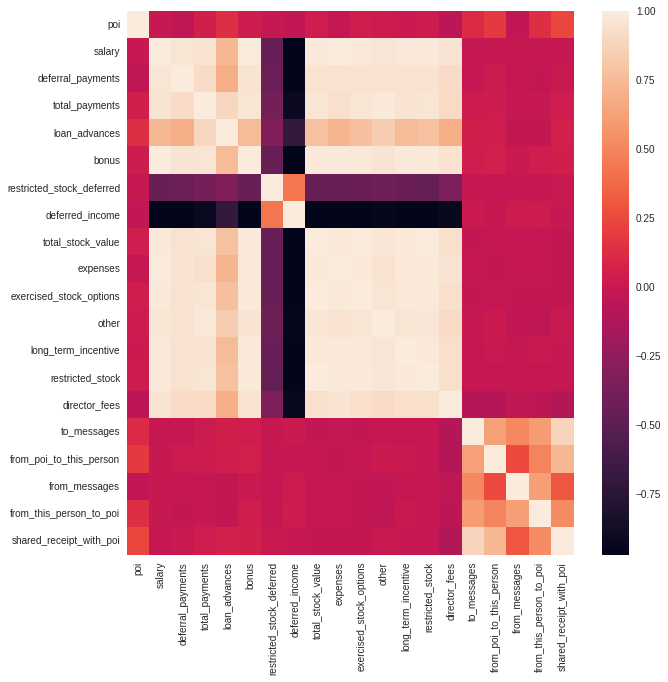

In [12]:
### find the correlation in all_features
plt.figure(figsize=(10, 10))
sns.heatmap(my_data.corr());

**There is no super corelation.**

#### (D). Is the Data Balanced?

In [13]:
pd.DataFrame(data_dict).T['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

**Data is very much imbalanced and more biased to class 0.**

### ii. Data Preparation
We will prepare the data for better analysis and modeling. We will
1. Remove the outliers
2. Create new feature(s)
3. Select higly correlated features

#### 1. Outliers detection and removal

**Inspecting with box plot**

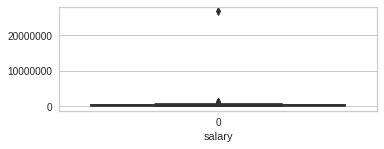

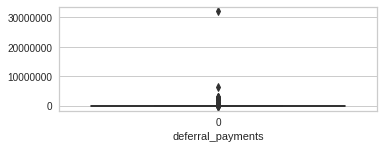

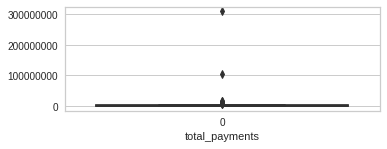

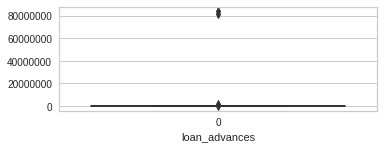

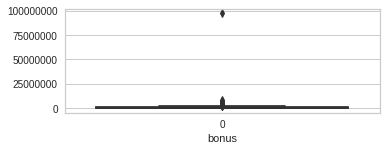

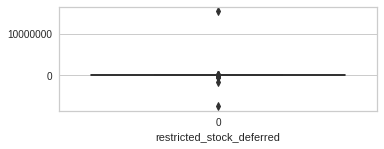

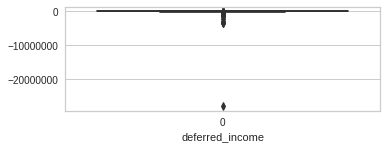

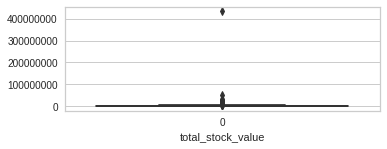

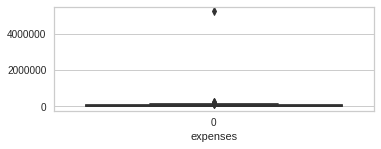

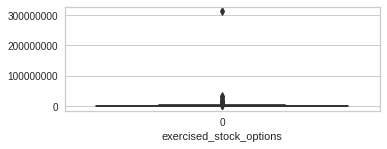

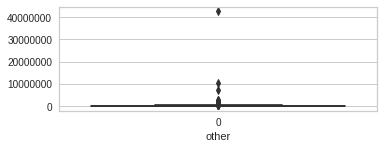

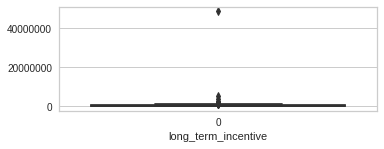

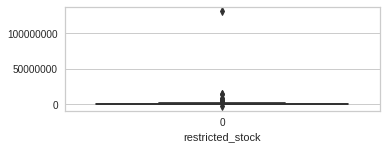

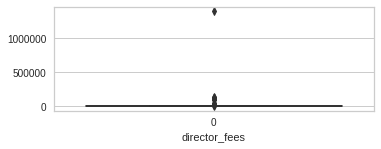

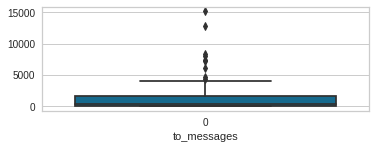

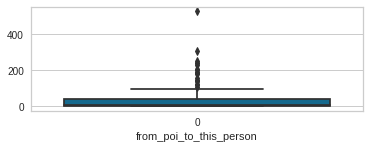

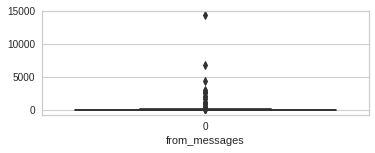

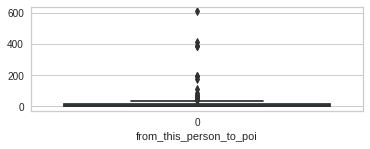

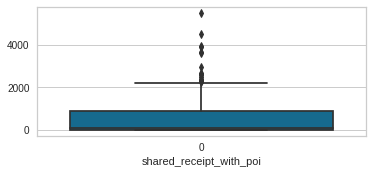

In [14]:
### Task 2: Remove outliers

for i in range(1, len(features_list)):
  plt.figure(figsize = (10,20))
  plt.subplot(10, 2, i)
  sns.boxplot(data=my_data[features_list[i]])
  plt.ticklabel_format(style='plain', axis='y')
  plt.xlabel(features_list[i])
  plt.tight_layout()


**Using IQR**

In [15]:
q1 = my_data.quantile(0.25)
q3 = my_data.quantile(0.75)
iqr = q3 - q1

In [16]:
iqr

poi                                0.0
salary                        271442.0
deferral_payments              10259.0
total_payments               1877096.0
loan_advances                      0.0
bonus                         800000.0
restricted_stock_deferred          0.0
deferred_income                38346.0
total_stock_value            2080344.0
expenses                       53947.0
exercised_stock_options      1729541.0
other                         150656.0
long_term_incentive           375304.0
restricted_stock              820604.0
director_fees                      0.0
to_messages                     1607.0
from_poi_to_this_person           41.0
from_messages                     52.0
from_this_person_to_poi           14.0
shared_receipt_with_poi          900.0
dtype: float64

In [17]:
(my_data < (q1 - 1.5 * iqr)) | (my_data > (q3 + 1.5 * iqr))

,poi,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
0,False,False,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,True,False,False,False,True,True,False,True,True,True,True,False,False,False,False,False,False
4,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
7,True,False,True,True,False,True,False,True,False,False,False,False,False,False,False,True,True,True,True,True
8,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


`True` in the data frame above represents the presence of outliers.

In [18]:
((my_data > (q3 + 1.5 * iqr)) | (my_data < (q1 - 1.5 * iqr))).any(axis=1)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9      False
10      True
11      True
12      True
13      True
14      True
15      True
16     False
17     False
18     False
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27     False
28     False
29     False
30      True
31      True
32      True
33      True
34      True
35      True
36     False
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44     False
45     False
46      True
47      True
48      True
49      True
50     False
51      True
52      True
53     False
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61     False
62      True
63      True
64     False
65      True
66      True
67     False
68      True
69      True
70     False
71      True
72      True
73      True
74      True
75      True
76      True

In [19]:
### removal of oultliers based on iqr
my_data_outliers_rm = my_data[((my_data > (q3 + 1.5 * iqr)) | (my_data < (q1 - 1.5 * iqr))).any(axis=1)]

In [20]:
my_data_outliers_rm.reset_index(inplace=True, drop=True)

In [21]:
my_data_outliers_rm

,poi,salary,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,exercised_stock_options,other,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
0,0.0,201955.0,2869717.0,4484442.0,0.0,4175000.0,-126027.0,-3081055.0,1729541.0,13868.0,1729541.0,152.0,304805.0,126027.0,0.0,2902.0,47.0,2195.0,65.0,1407.0
1,0.0,0.0,178980.0,182466.0,0.0,0.0,0.0,0.0,257817.0,3486.0,257817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,477.0,0.0,916197.0,0.0,0.0,-560222.0,-5104.0,5243487.0,56301.0,4046157.0,864523.0,0.0,1757552.0,0.0,566.0,39.0,29.0,0.0,465.0
3,0.0,267102.0,1295738.0,5634343.0,0.0,1200000.0,0.0,-1386055.0,10623258.0,11200.0,6680544.0,2660303.0,1586055.0,3942714.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,239671.0,260455.0,827696.0,0.0,400000.0,-82782.0,-201641.0,63014.0,129142.0,0.0,69.0,0.0,145796.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,80818.0,684694.0,860136.0,0.0,0.0,0.0,0.0,1599641.0,0.0,1599641.0,874.0,93750.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,231330.0,0.0,969068.0,0.0,700000.0,0.0,0.0,126027.0,37172.0,0.0,566.0,0.0,126027.0,0.0,7315.0,144.0,4343.0,386.0,2639.0
7,1.0,213999.0,2144013.0,5501630.0,0.0,5249999.0,0.0,-2334434.0,1110705.0,17355.0,953136.0,210698.0,0.0,157569.0,0.0,7991.0,228.0,484.0,108.0,5521.0
8,0.0,0.0,-102500.0,102500.0,0.0,0.0,44093.0,0.0,-44093.0,0.0,3285.0,0.0,0.0,0.0,3285.0,0.0,0.0,0.0,0.0,0.0
9,0.0,187922.0,0.0,618850.0,0.0,250000.0,0.0,-485813.0,659249.0,59175.0,0.0,427316.0,180250.0,659249.0,0.0,383.0,4.0,59.0,0.0,233.0


In [22]:
### Task 3: Create new feature(s)
my_data_outliers_rm['pct_amount_paid_from_bonus'] = my_data_outliers_rm['bonus'] / my_data_outliers_rm['total_payments']
my_data_outliers_rm.fillna(0, inplace=True)

#### 3. Finding and selecting more correlated features

In [54]:
### selecting only highly correlated featues
highly_corr_feats = []
for label, value in my_data_outliers_rm.corr().iloc[0, 1:].items():
  if abs(value) >= 0.01:
    print(label, value)
    highly_corr_feats.append(label)

highly_corr_feats.insert(0, 'poi')
highly_corr_feats

salary -0.01348534720535087
deferral_payments -0.059441541030877336
total_payments 0.03480874373634124
loan_advances 0.12146519966153144
deferred_income -0.022572223664231554
total_stock_value 0.01905986085399911
expenses -0.023013196416851747
exercised_stock_options 0.024741842154772
director_fees -0.0813148831891577
to_messages 0.07593153217072612
from_poi_to_this_person 0.15777003662744965
from_messages -0.060228275490507494
from_this_person_to_poi 0.10452222532448856
shared_receipt_with_poi 0.20601384256284802
pct_amount_paid_from_bonus 0.3555234905927448


['poi',
 'salary',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'exercised_stock_options',
 'director_fees',
 'to_messages',
 'from_poi_to_this_person',
 'from_messages',
 'from_this_person_to_poi',
 'shared_receipt_with_poi',
 'pct_amount_paid_from_bonus']

In [55]:
my_data_selected = my_data_outliers_rm[highly_corr_feats]
my_data_selected

,poi,salary,deferral_payments,total_payments,loan_advances,deferred_income,total_stock_value,expenses,exercised_stock_options,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,pct_amount_paid_from_bonus
0,0.0,201955.0,2869717.0,4484442.0,0.0,-3081055.0,1729541.0,13868.0,1729541.0,0.0,2902.0,47.0,2195.0,65.0,1407.0,0.930997
1,0.0,0.0,178980.0,182466.0,0.0,0.0,257817.0,3486.0,257817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,477.0,0.0,916197.0,0.0,-5104.0,5243487.0,56301.0,4046157.0,0.0,566.0,39.0,29.0,0.0,465.0,0.000000
3,0.0,267102.0,1295738.0,5634343.0,0.0,-1386055.0,10623258.0,11200.0,6680544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212980
4,0.0,239671.0,260455.0,827696.0,0.0,-201641.0,63014.0,129142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.0,63744.0,0.0,762135.0,0.0,-10800.0,384930.0,51870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
109,0.0,510364.0,0.0,4677574.0,0.0,0.0,6079137.0,57838.0,3282960.0,0.0,6019.0,186.0,556.0,24.0,3920.0,0.641358
110,0.0,317543.0,0.0,1934359.0,0.0,0.0,15144123.0,81353.0,1297049.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232635
111,0.0,0.0,0.0,84992.0,0.0,-25000.0,0.0,1413.0,0.0,108579.0,0.0,0.0,0.0,0.0,0.0,0.000000


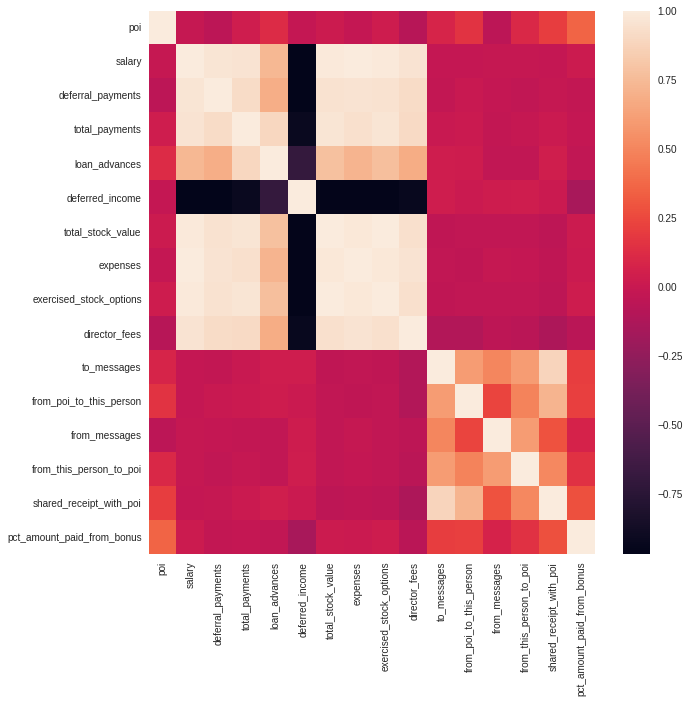

In [56]:
## corelation in filtered features
plt.figure(figsize=(10, 10))
sns.heatmap(my_data_selected.corr());

# Modeling experiments
1. Take the selected features from data as and find the best/highly accurate model.

In [57]:
my_data_selected

,poi,salary,deferral_payments,total_payments,loan_advances,deferred_income,total_stock_value,expenses,exercised_stock_options,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,pct_amount_paid_from_bonus
0,0.0,201955.0,2869717.0,4484442.0,0.0,-3081055.0,1729541.0,13868.0,1729541.0,0.0,2902.0,47.0,2195.0,65.0,1407.0,0.930997
1,0.0,0.0,178980.0,182466.0,0.0,0.0,257817.0,3486.0,257817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,477.0,0.0,916197.0,0.0,-5104.0,5243487.0,56301.0,4046157.0,0.0,566.0,39.0,29.0,0.0,465.0,0.000000
3,0.0,267102.0,1295738.0,5634343.0,0.0,-1386055.0,10623258.0,11200.0,6680544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212980
4,0.0,239671.0,260455.0,827696.0,0.0,-201641.0,63014.0,129142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.483269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.0,63744.0,0.0,762135.0,0.0,-10800.0,384930.0,51870.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
109,0.0,510364.0,0.0,4677574.0,0.0,0.0,6079137.0,57838.0,3282960.0,0.0,6019.0,186.0,556.0,24.0,3920.0,0.641358
110,0.0,317543.0,0.0,1934359.0,0.0,0.0,15144123.0,81353.0,1297049.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232635
111,0.0,0.0,0.0,84992.0,0.0,-25000.0,0.0,1413.0,0.0,108579.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [58]:
experiment = setup(my_data_selected, target='poi')  
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9000,0.7905,0.45,0.5000,0.4667,0.4457,0.4512,0.023
ada,Ada Boost Classifier,0.8375,0.6994,0.35,0.4000,0.3667,0.2914,0.2933,0.092
gbc,Gradient Boosting Classifier,0.8125,0.6786,0.35,0.3250,0.3067,0.2364,0.2529,0.065
nb,Naive Bayes,0.3161,0.4542,0.95,0.1739,0.2893,0.0494,0.1394,0.015
dt,Decision Tree Classifier,0.7357,0.5798,0.35,0.2333,0.2667,0.1390,0.1452,0.016
rf,Random Forest Classifier,0.8625,0.6875,0.25,0.3000,0.2667,0.2314,0.2369,0.467
lda,Linear Discriminant Analysis,0.8232,0.7274,0.30,0.2500,0.2667,0.2029,0.2083,0.015
ridge,Ridge Classifier,0.8357,0.0000,0.20,0.2000,0.2000,0.1571,0.1571,0.014
svm,SVM - Linear Kernel,0.7214,0.0000,0.25,0.1750,0.1900,0.0624,0.0587,0.016
et,Extra Trees Classifier,0.8482,0.7125,0.20,0.1500,0.1667,0.1457,0.1512,0.486


In [59]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6049, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#### best model found in first experiment
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=8895)

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

In [67]:
scaller = MinMaxScaler()

best_model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=8895)

#### Model training and evaluation

In [68]:
### testing the best model with tester code
### splitting the selected data into X(features-independent vars) and y (labels-dependent vars)
labels, features = targetFeatureSplit(my_data_selected.values)

### ### scalling the data
features_scalled  = scaller.fit_transform(features)


### split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(features_scalled, labels, test_size=0.2, random_state=42)

In [69]:
### train the model 
best_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=8895)

In [70]:
### evaluate the model on testing data
### accuracy
preds = best_model.predict(X_test)

acc = best_model.score(X_test, y_test)
print('Accuracy=', acc)

prec = precision_score(y_test, preds)
print('Precision=', prec)

recall = recall_score(y_test, preds)
print('Recall=', recall)


Accuracy= 0.782608695652174
Precision= 0.2857142857142857
Recall= 1.0


In [71]:
my_data_selected.columns

Index(['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances',
       'deferred_income', 'total_stock_value', 'expenses',
       'exercised_stock_options', 'director_fees', 'to_messages',
       'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',
       'shared_receipt_with_poi', 'pct_amount_paid_from_bonus'],
      dtype='object')

In [72]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html


precision, recall, accuracy = test_classifier(best_model, my_data_selected, folds=500)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')
print()

Precision: 0.37145969498910675
Recall: 0.341
Accuracy: 0.794



In [ ]:
#### saving the classifier
dump_classifier_and_data(best_model, my_dataset, features_list)